In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-52.58926968958626 -101.09077474370122
-18.41107128699892 21.80150308123578
-10.434753426056147 -166.51239524474022
70.10829398611341 -148.396553660491
-87.12504073465101 158.7041234084441
82.50813473059367 55.096611781041986
-3.228429741705426 -50.091093820152906
50.69826873785374 -39.01513010529834
58.10735336777623 113.86381863729099
-64.39342496538845 -50.74687632943605
-45.89889850075413 -138.51729855233026
64.8032067522696 -79.43430417650119
-50.42620197220905 68.1986481549464
51.380677109604534 -117.75609165330977
67.54932410625165 -137.8579765843467
79.27967244860463 -146.58729880055557
-61.939281444379304 -46.39826663744145
-5.654079519834681 -13.72546693267384
49.91035233651178 -175.35682945342708
-87.34437088024504 -114.53463528495178
-77.0810223369676 -140.10700573977354
-59.559489243002204 -118.16066455918343
26.697997882747117 91.4013397333772
48.439310148209756 43.81125103312209
80.61041829873042 9.1176108536514
-25.59467338885362 -23.902207448730053
-66.74902161487441 1

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=65f4cd878246031a02657daa14f6fc80


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [12]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # print(f"{i} {city}")
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | castro
Processing Record 2 of Set 13 | shakawe
Processing Record 3 of Set 13 | samusu
City not found. Skipping...
Processing Record 4 of Set 13 | college
Processing Record 5 of Set 13 | bluff
Processing Record 6 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 13 | tucurui
Processing Record 8 of Set 13 | nanortalik
Processing Record 9 of Set 13 | mamakan
Processing Record 10 of Set 13 | ushuaia
Processing Record 11 of Set 13 | rikitea
Processing Record 12 of Set 13 | iqaluit
Processing Record 13 of Set 13 | saint-philippe
Processing Record 14 of Set 13 | revelstoke
Processing Record 15 of Set 13 | aklavik
Processing Record 16 of Set 13 | barrow
Processing Record 17 of Set 13 | georgetown
Processing Record 18 of Set 13 | provideniya
Processing Record 19 of Set 13 | punta arenas
Processing Record 20 of Set 13 | samdrup jongkhar
Processing Record 21 of Set 13 | bereslavka
Processing Record 22 of Set 13 | barentsburg
City not 

Processing Record 36 of Set 16 | kaitangata
Processing Record 37 of Set 16 | ancud
Processing Record 38 of Set 16 | nhulunbuy
Processing Record 39 of Set 16 | carnarvon
Processing Record 40 of Set 16 | dalvik
Processing Record 41 of Set 16 | campo maior
Processing Record 42 of Set 16 | saint george
Processing Record 43 of Set 16 | berlevag
Processing Record 44 of Set 16 | komsomolskiy
Processing Record 45 of Set 16 | alice springs
Processing Record 46 of Set 16 | kota kinabalu
Processing Record 47 of Set 16 | markova
Processing Record 48 of Set 16 | yumen
Processing Record 49 of Set 16 | novokizhinginsk
Processing Record 50 of Set 16 | norilsk
Processing Record 1 of Set 17 | simao
Processing Record 2 of Set 17 | naze
Processing Record 3 of Set 17 | nipawin
Processing Record 4 of Set 17 | natitingou
Processing Record 5 of Set 17 | minsk
Processing Record 6 of Set 17 | kavieng
Processing Record 7 of Set 17 | podsineye
Processing Record 8 of Set 17 | uk
City not found. Skipping...
Process

Processing Record 20 of Set 20 | kudahuvadhoo
Processing Record 21 of Set 20 | bukama
Processing Record 22 of Set 20 | yanan
City not found. Skipping...
Processing Record 23 of Set 20 | bedesa
Processing Record 24 of Set 20 | saint-joseph
Processing Record 25 of Set 20 | puri
Processing Record 26 of Set 20 | mwene-ditu
Processing Record 27 of Set 20 | takoradi
Processing Record 28 of Set 20 | belyy yar
Processing Record 29 of Set 20 | taikang
Processing Record 30 of Set 20 | maloshuyka
City not found. Skipping...
Processing Record 31 of Set 20 | lamu
Processing Record 32 of Set 20 | masloc
Processing Record 33 of Set 20 | sefophe
Processing Record 34 of Set 20 | ocos
Processing Record 35 of Set 20 | banaue
Processing Record 36 of Set 20 | phonhong
Processing Record 37 of Set 20 | luwuk
Processing Record 38 of Set 20 | bilibino
Processing Record 39 of Set 20 | sitka
Processing Record 40 of Set 20 | putatan
Processing Record 41 of Set 20 | garissa
Processing Record 42 of Set 20 | poronay

Processing Record 9 of Set 24 | tessalit
Processing Record 10 of Set 24 | miranda
Processing Record 11 of Set 24 | gravdal
Processing Record 12 of Set 24 | kananga
Processing Record 13 of Set 24 | isla vista
Processing Record 14 of Set 24 | azimur
City not found. Skipping...
Processing Record 15 of Set 24 | vazante
Processing Record 16 of Set 24 | lukovetskiy
Processing Record 17 of Set 24 | kaeo
Processing Record 18 of Set 24 | strathpeffer
Processing Record 19 of Set 24 | nansio
Processing Record 20 of Set 24 | kharabali
Processing Record 21 of Set 24 | san carlos de bariloche
Processing Record 22 of Set 24 | goure
Processing Record 23 of Set 24 | saint-louis
Processing Record 24 of Set 24 | dzaoudzi
Processing Record 25 of Set 24 | buraydah
Processing Record 26 of Set 24 | kamenka
Processing Record 27 of Set 24 | niksic
Processing Record 28 of Set 24 | ust-kuyga
Processing Record 29 of Set 24 | bose
Processing Record 30 of Set 24 | margate
Processing Record 31 of Set 24 | san rafael

In [13]:
#Length of city_data

len(city_data)


len of city_data: 592


In [15]:
# Run an API request for each of the cities.
try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,67.78,63,43,6.13,BR,2022-07-14 20:17:57
1,Shakawe,-18.3667,21.8500,57.02,37,0,5.59,BW,2022-07-14 20:17:57
2,College,64.8569,-147.8028,65.59,39,75,9.22,US,2022-07-14 20:17:58
3,Bluff,-46.6000,168.3333,37.80,87,100,14.50,NZ,2022-07-14 20:17:58
4,Tucurui,-3.7661,-49.6725,85.53,64,78,0.72,BR,2022-07-14 20:17:58
...,...,...,...,...,...,...,...,...,...
588,Axim,4.8699,-2.2405,75.67,88,96,8.81,GH,2022-07-14 20:16:19
589,Merrill,45.1805,-89.6835,79.57,53,40,4.61,US,2022-07-14 20:20:36
590,Ventspils,57.3894,21.5606,57.13,94,75,5.75,LV,2022-07-14 20:20:36
591,Yerbogachen,61.2767,108.0108,51.87,97,100,3.36,RU,2022-07-14 20:20:37


In [17]:
#Reorder the columns 

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Castro,BR,2022-07-14 20:17:57,-24.7911,-50.0119,67.78,63,43,6.13
1,Shakawe,BW,2022-07-14 20:17:57,-18.3667,21.8500,57.02,37,0,5.59
2,College,US,2022-07-14 20:17:58,64.8569,-147.8028,65.59,39,75,9.22
3,Bluff,NZ,2022-07-14 20:17:58,-46.6000,168.3333,37.80,87,100,14.50
4,Tucurui,BR,2022-07-14 20:17:58,-3.7661,-49.6725,85.53,64,78,0.72
5,Nanortalik,GL,2022-07-14 20:17:59,60.1432,-45.2371,47.88,75,100,5.39
6,Mamakan,RU,2022-07-14 20:17:59,57.8161,114.0028,60.98,94,42,2.28
7,Ushuaia,AR,2022-07-14 20:17:59,-54.8000,-68.3000,33.42,80,0,2.30
8,Rikitea,PF,2022-07-14 20:17:59,-23.1203,-134.9692,66.40,82,100,11.18
9,Iqaluit,CA,2022-07-14 20:18:00,63.7506,-68.5145,49.73,76,75,8.05


In [18]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Castro,-24.7911,-50.0119,67.78,63,43,6.13,BR,2022-07-14 20:17:57
1,Shakawe,-18.3667,21.8500,57.02,37,0,5.59,BW,2022-07-14 20:17:57
2,College,64.8569,-147.8028,65.59,39,75,9.22,US,2022-07-14 20:17:58
3,Bluff,-46.6000,168.3333,37.80,87,100,14.50,NZ,2022-07-14 20:17:58
4,Tucurui,-3.7661,-49.6725,85.53,64,78,0.72,BR,2022-07-14 20:17:58
5,Nanortalik,60.1432,-45.2371,47.88,75,100,5.39,GL,2022-07-14 20:17:59
6,Mamakan,57.8161,114.0028,60.98,94,42,2.28,RU,2022-07-14 20:17:59
7,Ushuaia,-54.8000,-68.3000,33.42,80,0,2.30,AR,2022-07-14 20:17:59
8,Rikitea,-23.1203,-134.9692,66.40,82,100,11.18,PF,2022-07-14 20:17:59
9,Iqaluit,63.7506,-68.5145,49.73,76,75,8.05,CA,2022-07-14 20:18:00


In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [21]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1657830491.5775924

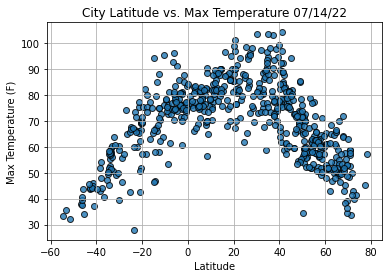

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

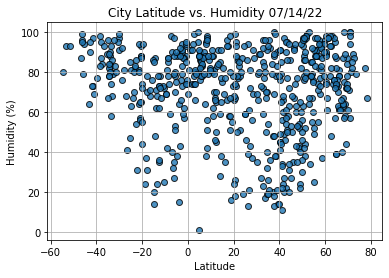

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

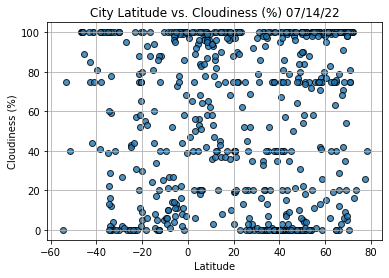

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

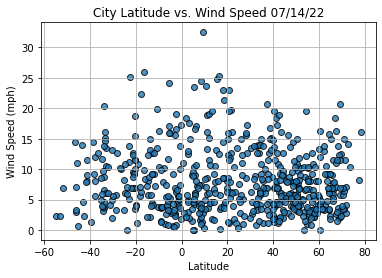

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create a new DataFrame from the current DataFrame 
# Use loc method to get a specific row from a current DataFrame 
index13 = city_data_df.loc[13]
index13

City                       Barrow
Lat                       71.2906
Lng                     -156.7887
Max Temp                    33.82
Humidity                       80
Cloudiness                    100
Wind Speed                   11.5
Country                        US
Date          2022-07-14 20:16:00
Name: 13, dtype: object

In [30]:
# Filter the DF for all Northern Hemisphere latitudes >= 0
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
588     True
589     True
590     True
591     True
592     True
Name: Lat, Length: 593, dtype: bool

In [31]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,College,64.8569,-147.8028,65.59,39,75,9.22,US,2022-07-14 20:17:58
5,Nanortalik,60.1432,-45.2371,47.88,75,100,5.39,GL,2022-07-14 20:17:59
6,Mamakan,57.8161,114.0028,60.98,94,42,2.28,RU,2022-07-14 20:17:59
9,Iqaluit,63.7506,-68.5145,49.73,76,75,8.05,CA,2022-07-14 20:18:00
11,Revelstoke,50.9832,-118.2023,69.82,52,75,10.36,CA,2022-07-14 20:16:42


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

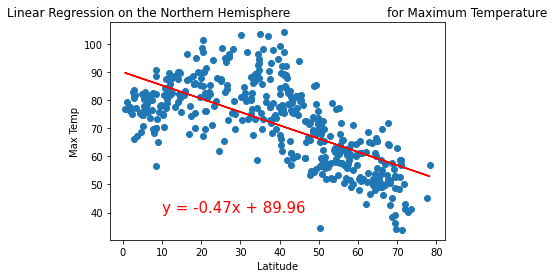

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

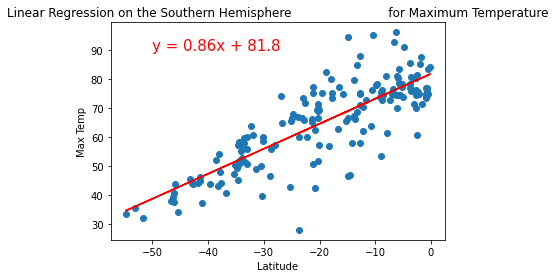

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

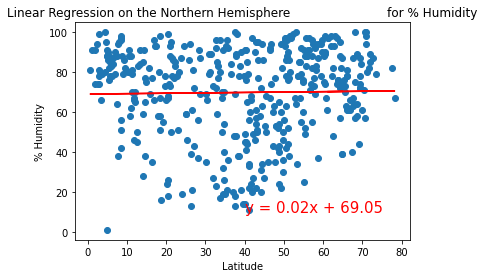

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

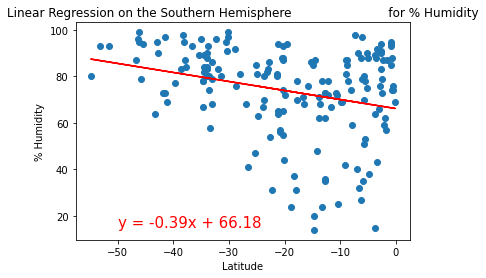

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

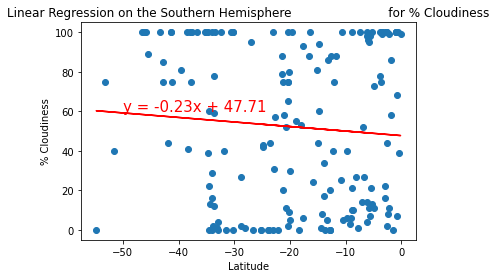

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

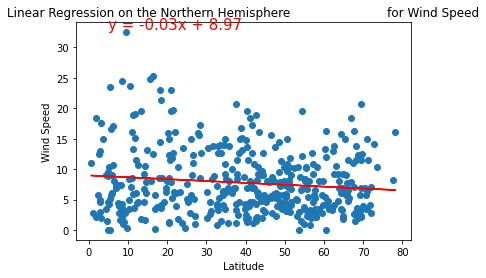

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title("Linear Regression on the Northern Hemisphere \n for Wind Speed")

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(5,33))

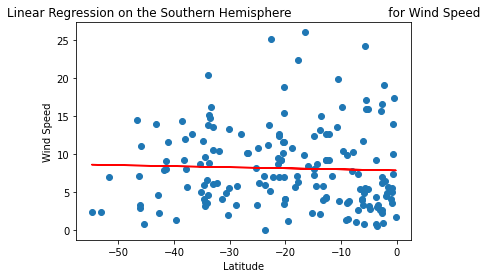

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))